# Create Model
Runs power system load flow (PSLF) methods on a load profile. After that is complete, an artificial neural network (ANN) creates a model of that function

Developed by Mike Bardwell. University of Alberta. 2018

In [11]:
import sys; sys.path.append('../'); sys.path.append('../../')
from powerflowsim import PowerFlowSim
from regression_tools import TrainANN

# Power System Load Flow

In [12]:
# PSLF parameters
number_of_timestamps = 100
topology = 'radial'
number_of_houses = 5
usecase = '_Rdominantlines' # for naming output ANN model file

In [13]:
# Run PSLF
pfs = PowerFlowSim(number_of_timestamps, 
                   topology,  
                   '../_configs/montecarlo' + str(number_of_houses) + '.json')
pfs.nrPFSim(False)

# Machine Learning

ANN regression loss: 0.00010633855708874762, mae: 0.007706647738814354


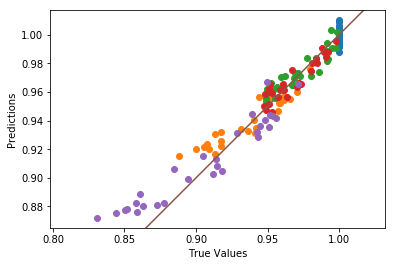

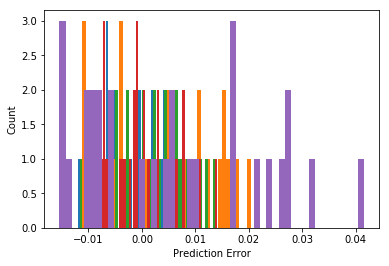

Saved model to disk


In [15]:
# ANN function mapping
ann = TrainANN(pfs.nodeloads, pfs.nodevoltages)
ann.buildModel()
ann.trainModel()
ann.evaluateModel()
ann.predictWithModel()

filename = topology + '_' + str(number_of_houses) + 'houses_' + str(number_of_timestamps) + 'timestamps' + usecase

ann.saveModel(filename)
print('saved filename: {}'.format(filename))

ANN regression loss: 3.746119546121918e-05, mae: 0.004266389179974794


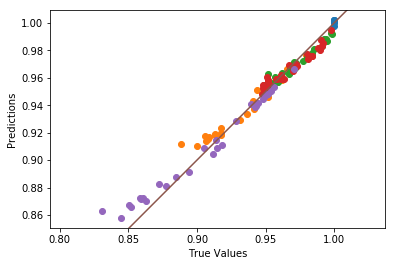

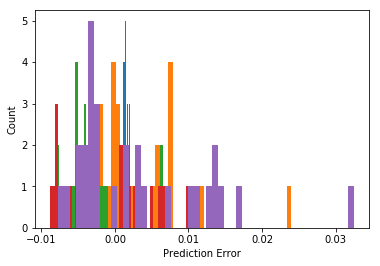

In [16]:
# For repeat training

ann.trainModel()
ann.evaluateModel()
ann.predictWithModel()

In [17]:
# Save model after repeat training
save = False # as opposed to just commenting out the code below

if save:
    filename = topology + '_' + str(number_of_houses) + 'houses_' + str(number_of_timestamps) + 'timestamps' + usecase
    ann.saveModel(filename)
    print('saved filename: {}'.format(filename))